# Synthetic Financial Datasets For Fraud Detection

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df = pd.read_csv('SyntheticFinancialDataset.csv')

### Basic Stas

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Transcation Type

In [8]:
df_new = df.copy()

df_new['type1'] = np.nan

df_new.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('C')), 'type1'] = 'CC'
df_new.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('M')), 'type1'] = 'CM'
df_new.loc[(df.nameOrig.str.contains('M')) & (df.nameDest.str.contains('C')), 'type1'] = 'MC'
df_new.loc[(df.nameOrig.str.contains('M')) & (df.nameDest.str.contains('M')), 'type1'] = 'MM'

df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type1
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,CM
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,CC
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,CC
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,CC
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,CC


In [9]:
df_new.type1.value_counts()

CC    4211125
CM    2151495
Name: type1, dtype: int64

### ` Hence dataset has only two types of transactions (C to C) & (C to M)`

In [10]:
Fraud = df_new[df_new.isFraud == 1]
Valid = df_new[df_new.isFraud == 0]

print(f'''Fraud Transaction by type1\n{Fraud.type1.value_counts()}\n\n
Valid Transactionby type1\n{Valid.type1.value_counts()}''')

Fraud Transaction by type1
CC    8213
Name: type1, dtype: int64


Valid Transactionby type1
CC    4202912
CM    2151495
Name: type1, dtype: int64


In [11]:
Fraud = Fraud.drop('type1', axis=1)
Valid = Valid.drop('type1', axis=1)
df_new = df_new.drop('type1', axis=1)
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### `Hence Fraud occur only in C to C type transaction `

In [12]:
print(f'''Fraud Transaction by type1\n{Fraud.type.value_counts()}\n\n
Valid Transactionby type1\n{Valid.type.value_counts()}''')

Fraud Transaction by type1
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


Valid Transactionby type1
CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


### `Hence Fraud only occur in Transfer & Cash out`

In [13]:
Valid = Valid[(Valid.type == 'CASH_OUT') & (Valid.type == 'TRANSFER')]
df_new = df_new[(df_new.type == 'CASH_OUT') | (df_new.type == 'TRANSFER')]

In [14]:
wrong_org_bal = sum(df.oldbalanceOrg - df.amount != df.newbalanceOrig) 
wrong_des_bal = sum(df.oldbalanceDest + df.amount != df.newbalanceDest)

print(f'''% Error in giving Money: {round(wrong_org_bal/len(df), 2) * 100}
% Error in receiving Money: {round(wrong_des_bal/len(df), 2) * 100}''')

% Error in giving Money: 85.0
% Error in receiving Money: 74.0


In [15]:
df_new[df_new.amount > df_new.oldbalanceOrg]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362313,718,CASH_OUT,111963.72,C1438119383,4514.00,0.0,C99772923,154925.27,266888.99,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.00,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.0,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.0,C1515639522,24893.67,211167.51,0,0


### `Check for negative numbers`

In [16]:
relevant_cols = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()

In [17]:
num_neg_amt = sum(n < 0 for n in relevant_cols)
num_neg_amt

0

### `Logically Invalid Transactions`

In [18]:
sum(df.amount > df.oldbalanceOrg)

4079080

In [19]:
sum(df.amount > df.newbalanceDest)

2661141

In [20]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [21]:
df_new.shape

(2770409, 11)

In [22]:
df_new['errorbalanceOrg'] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
df_new['errorbalanceDest'] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest

In [23]:
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0.00,8.500025e+05


In [24]:
df_new[df_new.errorbalanceOrg > 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,213808.94,182703.50
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0,214605.30,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0,300850.89,-2401220.00
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0,83569.30,396799.55
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0,55011.88,63100.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.00,C1515639522,24893.67,211167.51,0,0,18227.84,0.00
6362322,718,TRANSFER,82096.45,C614459560,13492.00,0.00,C855350324,0.00,82096.45,0,0,68604.45,0.00
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.00,0.00,1,1,10000000.00,10000000.00
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1,7316255.05,7316255.05


In [25]:
df_new[df_new.errorbalanceDest > 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,214605.30,2.377353e+05
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0,83569.30,3.967996e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,0.00,3.396821e+05
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0.00,8.500025e+05


In [26]:
fraud = df_new[df_new["isFraud"] == 1]
valid = df_new[df_new["isFraud"] == 0]

In [27]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0.0,181.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0.0,21363.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,0.0,2806.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,0.0,29008.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,0.0,20128.0


## `Error Balance Stats`

In [28]:
fraud.errorbalanceOrg.describe()

count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: errorbalanceOrg, dtype: float64

In [29]:
valid.errorbalanceOrg.describe()

count    2.762196e+06
mean     2.868035e+05
std      8.763752e+05
min     -1.000000e-02
25%      5.261343e+04
50%      1.442008e+05
75%      2.804663e+05
max      9.244552e+07
Name: errorbalanceOrg, dtype: float64

In [30]:
fraud.errorbalanceDest.describe()

count    8.213000e+03
mean     7.325093e+05
std      1.867748e+06
min     -8.875516e+06
25%      0.000000e+00
50%      2.231460e+03
75%      4.427220e+05
max      1.000000e+07
Name: errorbalanceDest, dtype: float64

In [31]:
valid.errorbalanceDest.describe()

count    2.762196e+06
mean    -3.091033e+04
std      5.840943e+05
min     -7.588573e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.977761e+06
Name: errorbalanceDest, dtype: float64

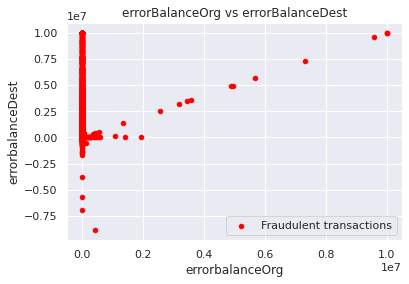

In [32]:
ax = plt.subplot()

fplot = fraud.plot(x="errorbalanceOrg",y="errorbalanceDest",color="red",kind="scatter", \
                   ax=ax,label="Fraudulent transactions")
plt.title("errorBalanceOrg vs errorBalanceDest")
plt.show()

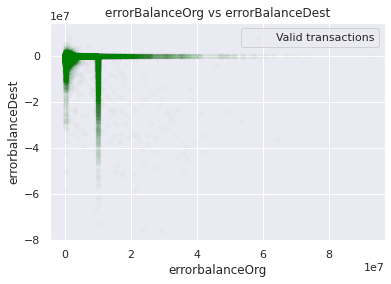

In [33]:
ax = plt.subplot()

vplot = valid.plot(x="errorbalanceOrg",y="errorbalanceDest",color="green",kind="scatter",\
                   alpha=0.01,ax=ax,label="Valid transactions")
plt.title("errorBalanceOrg vs errorBalanceDest")
plt.show()

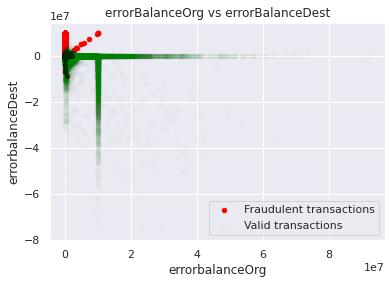

In [34]:
ax = plt.subplot()

fplot = fraud.plot(x="errorbalanceOrg",y="errorbalanceDest",color="red",kind="scatter", \
                   ax=ax,label="Fraudulent transactions")
vplot = valid.plot(x="errorbalanceOrg",y="errorbalanceDest",color="green",kind="scatter",\
                   alpha=0.01,ax=ax,label="Valid transactions")

plt.title("errorBalanceOrg vs errorBalanceDest")
plt.show()

In [35]:
print(f'''Fraud Transaction
Original > 0:    { len(fraud[fraud.errorbalanceOrg > 0]) / len(fraud) }
Destination > 0: { len(fraud[fraud.errorbalanceDest > 0]) / len(fraud) }

Valid Transaction
Original > 0:    { len(valid[valid.errorbalanceOrg > 0]) / len(valid) }
Destination > 0: { len(valid[valid.errorbalanceDest > 0]) / len(valid) }
''')

Fraud Transaction
Original > 0:    0.006331425788384269
Destination > 0: 0.5712894192134421

Valid Transaction
Original > 0:    0.9067180605576143
Destination > 0: 0.19744942067832985



In [36]:
fraud_transfer = fraud[fraud['type'] == 'TRANSFER']
fraud_cash_out = fraud[fraud['type'] == 'CASH_OUT']

In [37]:
fraud_transfer.nameDest.isin(fraud_cash_out.nameOrig).any()

False

### `getting rid of nameOrig & nameDest column`

In [38]:
names = ["nameOrig","nameDest"]
fraud = fraud.drop(names, 1)
valid = valid.drop(names,1)
df_new = df_new.drop(names,1)

In [39]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0,0.00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0,0.00,8.500025e+05


### `how many observations were flagged as Fraud?`

In [40]:
flagged = df_new[df_new["isFlaggedFraud"] == 1]
flagged_correctly = sum(flagged["isFraud"] == 1)
flagged_wrongly = len(flagged) - flagged_correctly
total = flagged_correctly + flagged_wrongly
print(flagged_correctly," observations were flagged correctly and ", flagged_wrongly, \
      " observations were flagged wrongly for a total of ", total, " flagged observations.")

# Transaction type = Transfer & amount greater than 200, 000 are in the dataset
should_be_flagged = fraud[(fraud["amount"] > 200000) & (fraud["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

16  observations were flagged correctly and  0  observations were flagged wrongly for a total of  16  flagged observations.
number of observations that should be flagged:  2740


### `isFlaggedFraud Feature in Dataset`

In [41]:
flagged = df_new[df_new['isFlaggedFraud'] == 1]

In [42]:
flagged

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrg,errorbalanceDest
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1,4953893.08,4953893.08
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1,1343002.08,1343002.08
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1,536624.41,536624.41
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1,4892193.09,4892193.09
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1,10000000.00,10000000.00
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1,9585040.37,9585040.37
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1,3576297.10,3576297.10
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1,353874.22,353874.22
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1,2542664.27,2542664.27
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1,10000000.00,10000000.00


In [43]:
flagged_correctly = sum(flagged.isFraud == 1)
flagged_wrongly = len(flagged) - flagged_correctly
Total = flagged_correctly + flagged_wrongly

print(f'''Flagged
Correctly Flagged: {flagged_correctly}
Wrongly Flagged: {flagged_wrongly}
Total: {Total}
''')

Flagged
Correctly Flagged: 16
Wrongly Flagged: 0
Total: 16



In [44]:
should_be_flagged = fraud[(fraud["amount"] > 200000) & (fraud["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

number of observations that should be flagged:  2740


In [45]:
should_be_flagged = df[(df.amount > 200000) & (df.type == 'TRANSFER')]
len(should_be_flagged)

409110

In [46]:
fraud = fraud.drop("isFlaggedFraud",1)
valid = valid.drop("isFlaggedFraud",1)
df_new = df_new.drop("isFlaggedFraud",1)

In [47]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05


### `Hence, isFlaggedFraud is not much usefull`

### `step feature in dataset`

Text(0.5, 1.0, '# of valid transactions over time')

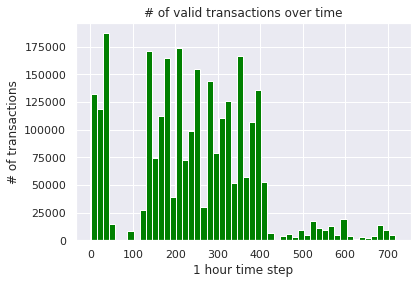

In [48]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

Text(0.5, 1.0, '# of valid transactions over time')

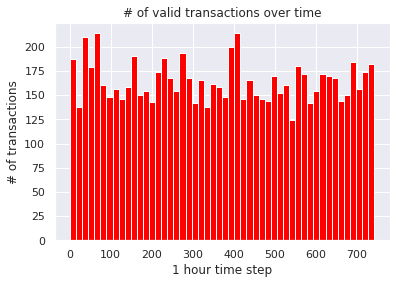

In [49]:
bins = 50

fraud.hist(column="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

### `Checking by Days & Weeks`

In [50]:
num_days = 7
num_hours = 24

fraud_days = fraud['step'] % num_days
fraud_hours = fraud['step'] % num_hours

valid_days = valid['step'] % num_days
valid_hours = valid['step'] % num_hours

Text(0, 0.5, '# of transaction')

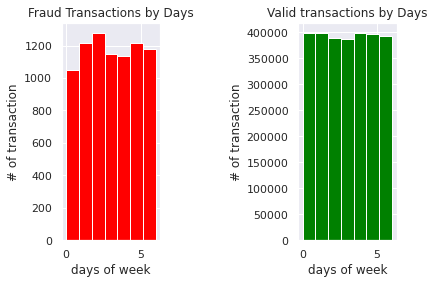

In [51]:
plt.subplot(1, 3, 1)

fraud_days.hist(bins=num_days, color='red')
plt.title('Fraud Transactions by Days')
plt.xlabel('days of week')
plt.ylabel('# of transaction')

plt.subplot(1, 3, 3)

valid_days.hist(bins=num_days, color='green')
plt.title('Valid transactions by Days')
plt.xlabel('days of week')
plt.ylabel('# of transaction')

Text(0, 0.5, '# of transaction')

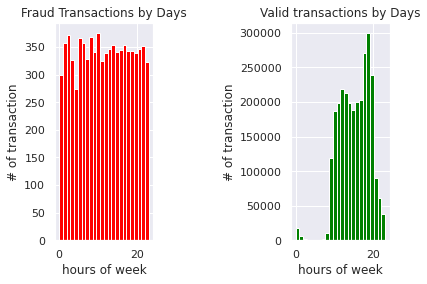

In [52]:
plt.subplot(1, 3, 1)

fraud_hours.hist(bins=num_hours, color='red')
plt.title('Fraud Transactions by Days')
plt.xlabel('hours of week')
plt.ylabel('# of transaction')

plt.subplot(1, 3, 3)

valid_hours.hist(bins=num_hours, color='green')
plt.title('Valid transactions by Days')
plt.xlabel('hours of week')
plt.ylabel('# of transaction')

In [53]:
df1 = df_new.copy()

df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [54]:
df1['HourOfDays'] = np.nan
df1.HourOfDays = df_new.step % 24

df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDays
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1


In [55]:
print(f'''Stats on the amounts moved in Fraud Transactions: 
{ fraud.amount.describe() }

Stats on the amounts moved in Valid Transactions:
{ valid.amount.describe() }
''')

Stats on the amounts moved in Fraud Transactions: 
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Stats on the amounts moved in Valid Transactions:
count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64



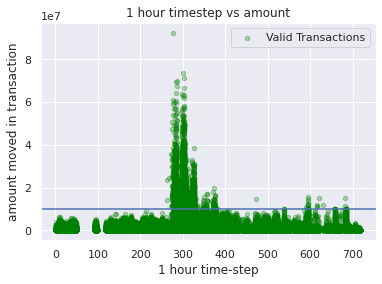

Proportion of transactions where the amount moved is greater than 10 million: 0.0008818192548464865



In [56]:
alpha = 0.3
fig, ax = plt.subplots()

valid.plot.scatter(x='step', y='amount', color='green', alpha=alpha, ax=ax, label='Valid Transactions')

plt.title('1 hour timestep vs amount')
plt.xlabel('1 hour time-step')
plt.ylabel('amount moved in transaction')
plt.legend(loc='upper right')

plt.axhline(y=10000000)
plt.show()

print(f'''Proportion of transactions where the amount moved is greater than 10 million: \
{ len(df_new[df_new.amount > 10000000]) / len(df_new) }
''')

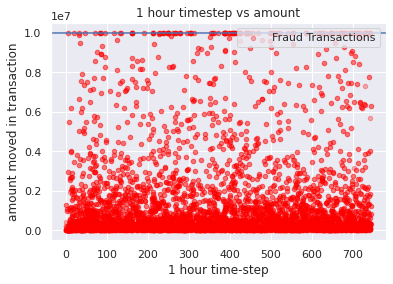

Proportion of transactions where the amount moved is greater than 10 million: 0.0008818192548464865



In [57]:
alpha = 0.3
fig, ax = plt.subplots()

fraud.plot.scatter(x='step', y='amount', color='red', alpha=alpha, ax=ax, label='Fraud Transactions')

plt.title('1 hour timestep vs amount')
plt.xlabel('1 hour time-step')
plt.ylabel('amount moved in transaction')
plt.legend(loc='upper right')

plt.axhline(y=10000000)
plt.show()

print(f'''Proportion of transactions where the amount moved is greater than 10 million: \
{ len(df_new[df_new.amount > 10000000]) / len(df_new) }
''')

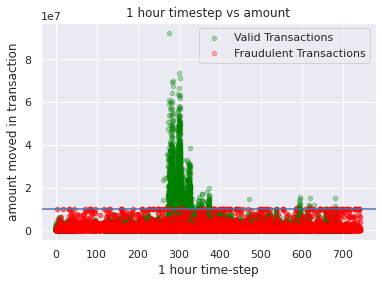

Proportion of transactions where the amount moved is greater than 10 million: 0.0008818192548464865



In [58]:
alpha = 0.3
fig,ax = plt.subplots()

valid.plot.scatter(x="step",y="amount",color="green",alpha=alpha,ax=ax,label="Valid Transactions")
fraud.plot.scatter(x="step",y="amount",color="red",alpha=alpha,ax=ax, label="Fraudulent Transactions")

plt.title("1 hour timestep vs amount")
plt.xlabel("1 hour time-step")
plt.ylabel("amount moved in transaction")
plt.legend(loc="upper right")

plt.axhline(y=10000000)
plt.show()


print(f'''Proportion of transactions where the amount moved is greater than 10 million: \
{ len(df_new[df_new.amount > 10000000]) / len(df_new) }
''')

### `Transaction with amount greater than 10,000,000 are valid is less than 0.01%`

## `One Hot Encoding`

In [59]:
dataset = pd.get_dummies(df_new,prefix=['type'])


In [60]:
pd.DataFrame.head(dataset)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,0,1


## `Splitting Dataset`

In [61]:
from sklearn.model_selection import train_test_split

X = dataset.drop("isFraud",1)
y = dataset.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)    

## `Normalizing Dataset`

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# `Model`

In [178]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, \
                            classification_report, hamming_loss, roc_curve, auc

## `Multi Layer perceptron(MLP) ANN`

In [157]:
ncol = len(X.columns)
hidden_layers = (ncol, ncol, ncol)

### `Make Pipeline`

In [158]:
pipeline = make_pipeline(StandardScaler(), \
            MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42))

In [159]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,
                               random_state=42))])

In [160]:
y_pred = pipeline.predict(X_train)

y_pred_test = pipeline.predict(X_test)

### `Accuracy`

In [161]:
print(f'''Accuracy:
TRAIN: {accuracy_score(y_train, y_pred)}
TEST:  {accuracy_score(y_test, y_pred_test)}

Balanced Accuracy:
TRAIN: {balanced_accuracy_score(y_train, y_pred)}
TEST:  {balanced_accuracy_score(y_test, y_pred_test)}
''')

Accuracy:
TRAIN: 0.9993478698203778
TEST:  0.9993603839428937

Balanced Accuracy:
TRAIN: 0.912455901660825
TEST:  0.9195245777436558



### `Confusion Matrix`

In [162]:
print(f'''Confusion Matrix
Train:
{confusion_matrix(y_train, y_pred)}
Test:
{confusion_matrix(y_test, y_pred_test)}
''')

Confusion Matrix
Train:
[[2071358     275]
 [   1080    5093]]
Test:
[[690448    115]
 [   328   1712]]



### `Classification Report`

In [163]:
print(f'''\tClassification Report
Train:
{classification_report(y_train, y_pred)}
Test:
{classification_report(y_test, y_pred_test)}
''')

	Classification Report
Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2071633
           1       0.95      0.83      0.88      6173

    accuracy                           1.00   2077806
   macro avg       0.97      0.91      0.94   2077806
weighted avg       1.00      1.00      1.00   2077806

Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690563
           1       0.94      0.84      0.89      2040

    accuracy                           1.00    692603
   macro avg       0.97      0.92      0.94    692603
weighted avg       1.00      1.00      1.00    692603




### `ROC & AUC`

In [164]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

In [165]:
roc_train = auc(fpr_train, tpr_train)
roc_test = auc(fpr_test, tpr_train)

print(f'''\tArea Under Curve
Train: {roc_train}
Test: {roc_test}scaler.transform
''')

	Area Under Curve
Train: 0.912455901660825
Test: 0.9124390090272658



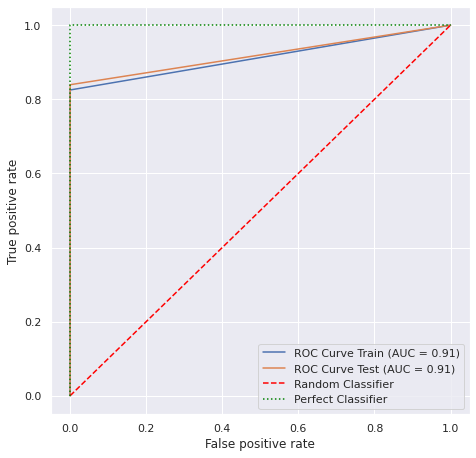

In [166]:
fig, ax = plt.subplots(figsize=(7.5,7.5))

plt.plot(fpr_train, tpr_train, label='ROC Curve Train (AUC = %0.2f)'%(roc_train))
plt.plot(fpr_test, tpr_test, label='ROC Curve Test (AUC = %0.2f)'%(roc_test))

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')d.DataFrame.head(dataset)
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

## `Random Forest Classifier`

In [169]:
pipeline = make_pipeline(StandardScaler(), \
                         RandomForestClassifier(n_estimators=15, oob_score=True, \
                                                class_weight='balanced', n_jobs=-1, random_state=42))

In [170]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=15, n_jobs=-1,
                                        oob_score=True, random_state=42))])

In [171]:
y_pred = pipeline.predict(X_train)

y_pred_test = pipeline.predict(X_test)

In [149]:
print(f'''Accuracy:
TRAIN: {accuracy_score(y_train, y_pred)}
TEST:  {accuracy_score(y_test, y_pred_test)}

Balanced Accuracy:
TRAIN: {balanced_accuracy_score(y_train, y_pred)}
TEST:  {balanced_accuracy_score(y_test, y_pred_test)}
''')

Accuracy:
TRAIN: 0.999997112338688
TEST:  0.9999826740571438

Balanced Accuracy:
TRAIN: 0.9995947691742352
TEST:  0.9975475715140414



In [172]:
print(f'''Confusion Matrix
Train:
{confusion_matrix(y_train, y_pred)}
Test:
{confusion_matrix(y_test, y_pred_test)}
''')

Confusion Matrix
Train:
[[2071632       1]
 [      5    6168]]
Test:
[[690561      2]
 [    10   2030]]



In [173]:
print(f'''\tClassification Report
Train:
{classification_report(y_train, y_pred)}
Test:
{classification_report(y_test, y_pred_test)}
''')

	Classification Report
Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2071633
           1       1.00      1.00      1.00      6173

    accuracy                           1.00   2077806
   macro avg       1.00      1.00      1.00   2077806
weighted avg       1.00      1.00      1.00   2077806

Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690563
           1       1.00      1.00      1.00      2040

    accuracy                           1.00    692603
   macro avg       1.00      1.00      1.00    692603
weighted avg       1.00      1.00      1.00    692603




In [174]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

In [175]:
roc_train = auc(fpr_train, tpr_train)
roc_test = auc(fpr_test, tpr_train)

print(f'''\tArea Under Curve
Train: {roc_train}
Test: {roc_test}
''')

	Area Under Curve
Train: 0.9995947691742352
Test: 0.9995935624359246



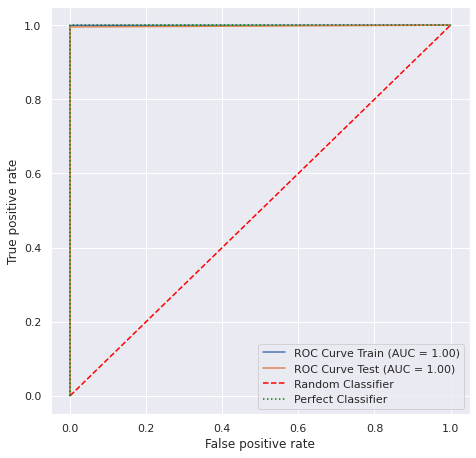

In [176]:
ipeline.fit(X_train, y_train)fig, ax = plt.subplots(figsize=(7.5,7.5))

plt.plot(fpr_train, tpr_train, label='ROC Curve Train (AUC = %0.2f)'%(roc_train))
plt.plot(fpr_test, tpr_test, label='ROC Curve Test (AUC = %0.2f)'%(roc_test))

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

## `XGBoost`

In [179]:
from xgboost import XGBClassifier

In [183]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())

pipeline = make_pipeline(StandardScaler(), \
                         XGBClassifier(max_depth=3, scale_pos_weight=weights, \
                                       n_jobs=-1, random_state=42, learning_rate=0))

In [184]:
pipeline.fit(X_train, y_train)

[18:20:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=336.3199805186899, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbo

In [185]:
y_pred = pipeline.predict(X_train)

y_pred_test = pipeline.predict(X_test)

In [186]:
print(f'''Accuracy:
TRAIN: {accuracy_score(y_train, y_pred)}
TEST:  {accuracy_score(y_test, y_pred_test)}

Balanced Accuracy:
TRAIN: {balanced_accuracy_score(y_train, y_pred)}
TEST:  {balanced_accuracy_score(y_test, y_pred_test)}
''')

Accuracy:
TRAIN: 0.9970290777868579
TEST:  0.997054589714454

Balanced Accuracy:
TRAIN: 0.5
TEST:  0.5



In [187]:
print(f'''Confusion Matrix
Train:
{confusion_matrix(y_train, y_pred)}
Test:
{confusion_matrix(y_test, y_pred_test)}
''')

Confusion Matrix
Train:
[[2071633       0]
 [   6173       0]]
Test:
[[690563      0]
 [  2040      0]]



In [188]:
print(f'''\tClassification Report
Train:
{classification_report(y_train, y_pred)}
Test:
{classification_report(y_test, y_pred_test)}
''')

	Classification Report
Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2071633
           1       0.00      0.00      0.00      6173

    accuracy                           1.00   2077806
   macro avg       0.50      0.50      0.50   2077806
weighted avg       0.99      1.00      1.00   2077806

Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690563
           1       0.00      0.00      0.00      2040

    accuracy                           1.00    692603
   macro avg       0.50      0.50      0.50    692603
weighted avg       0.99      1.00      1.00    692603




In [193]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

In [194]:
roc_train = auc(fpr_train, tpr_train)
roc_test = auc(fpr_test, tpr_train)

print(f'''\tArea Under Curve
Train: {roc_train}
Test: {roc_test}
''')

	Area Under Curve
Train: 0.5
Test: 0.5



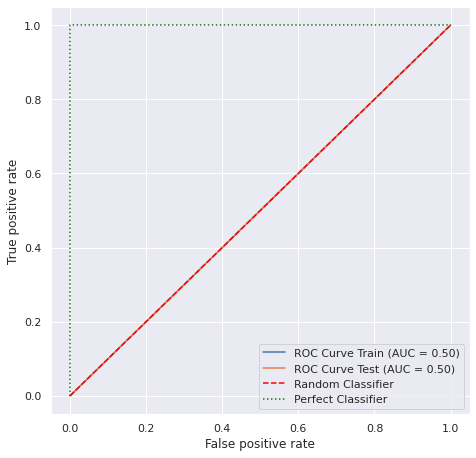

In [195]:
fig, ax = plt.subplots(figsize=(7.5,7.5))

plt.plot(fpr_train, tpr_train, label='ROC Curve Train (AUC = %0.2f)'%(roc_train))
plt.plot(fpr_test, tpr_test, label='ROC Curve Test (AUC = %0.2f)'%(roc_test))

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()